In [66]:
import csv
import pandas as pd
import numpy as np
data_dump = pd.read_csv('.Datasets/vehicles.csv')
data_dump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40081 non-null  float64
 1   barrelsA08       40081 non-null  float64
 2   charge120        40081 non-null  float64
 3   charge240        40081 non-null  float64
 4   city08           40081 non-null  int64  
 5   city08U          40081 non-null  float64
 6   cityA08          40081 non-null  int64  
 7   cityA08U         40081 non-null  float64
 8   cityCD           40081 non-null  float64
 9   cityE            40081 non-null  float64
 10  cityUF           40081 non-null  float64
 11  co2              40081 non-null  int64  
 12  co2A             40081 non-null  int64  
 13  co2TailpipeAGpm  40081 non-null  float64
 14  co2TailpipeGpm   40081 non-null  float64
 15  comb08           40081 non-null  int64  
 16  comb08U          40081 non-null  float64
 17  combA08     

/var/folders/qn/tyvcrfvs3972sr3mw0x7ptl80000gn/T/ipykernel_1764/3181632084.py:4: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  data_dump = pd.read_csv('https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/vehicles.csv')


clear from the data dump info that we have 24 categorical variables(object(23)+bool(1)) and 59 numeric variables.

In [2]:
import numpy as np
import pandas as pd

def getInfo():
    dataset = data_dump
    count = 0
    for i in dataset.columns:
        count += 1
        print("\n\n\n")
        print(f"Column {count}: {i}")
        if dataset[i].dtype =='object' or  dataset[i].dtype =='bool':
            print(f"Column Data type {dataset[i].dtype}, Categorical Variable")
            getFreq(i)  # Call the getFreq function for categorical variables
        else:
            print(f"Column Data type {dataset[i].dtype}, Numeric Variable")
            getStats(i)  # Call the getStats function for numeric variables
            
def getStats(col_name):
    # Print statistical information for numeric variables
    print(f" min. {round(np.min(data_dump[col_name]),2)}")
    print(f" max. {round(np.max(data_dump[col_name]),2)}")
    print(f" mean. {round(np.mean(data_dump[col_name]),2)}")
    print(f" median. {round(np.median(data_dump[col_name]),2)}")
    print(f" 1st Qu. {round(np.percentile(data_dump[col_name], 25),2)}")
    print(f" 3rd Qu. {round(np.percentile(data_dump[col_name], 75),2)}")
    
def getFreq(col_name):
    counts = data_dump[col_name].value_counts()
    if len(counts) > 6:
        # Get the top 6 categories
        top_categories = counts[:6]
    
        # Get the count of remaining categories
        other_count = counts[6:].sum()
    
        # Create a new series with the top categories and the "others" category
        updated_counts = pd.concat([top_categories, pd.Series([other_count], index=['(others)'])])
    
        print(updated_counts)  # Print the updated category counts
    else:
        print(counts)  # Print the original category counts


In [3]:
#Run this cell with the given function to get detailed dataset view
getInfo()





Column 1: barrels08
Column Data type float64, Numeric Variable
 min. 0.06
 max. 47.09
 mean. 17.36
 median. 16.48
 1st Qu. 14.33
 3rd Qu. 19.39




Column 2: barrelsA08
Column Data type float64, Numeric Variable
 min. 0.0
 max. 18.31
 mean. 0.22
 median. 0.0
 1st Qu. 0.0
 3rd Qu. 0.0




Column 3: charge120
Column Data type float64, Numeric Variable
 min. 0.0
 max. 0.0
 mean. 0.0
 median. 0.0
 1st Qu. 0.0
 3rd Qu. 0.0




Column 4: charge240
Column Data type float64, Numeric Variable
 min. 0.0
 max. 12.0
 mean. 0.04
 median. 0.0
 1st Qu. 0.0
 3rd Qu. 0.0




Column 5: city08
Column Data type int64, Numeric Variable
 min. 6
 max. 150
 mean. 18.21
 median. 17.0
 1st Qu. 15.0
 3rd Qu. 20.0




Column 6: city08U
Column Data type float64, Numeric Variable
 min. 0.0
 max. 150.0
 mean. 5.49
 median. 0.0
 1st Qu. 0.0
 3rd Qu. 12.27




Column 7: cityA08
Column Data type int64, Numeric Variable
 min. 0
 max. 145
 mean. 0.62
 median. 0.0
 1st Qu. 0.0
 3rd Qu. 0.0




Column 8: cityA08U
Colum

In [4]:
#Second Part Dependent Variable UCity 
dependent_variable ="UCity"
print(f"Dependent Variable = {dependent_variable}")
print("unadjusted city MPG ")

Dependent Variable = UCity
unadjusted city MPG 


In [5]:
print(f"Statistical details for {dependent_variable}:")
getStats(dependent_variable)

Statistical details for UCity:
 min. 0.0
 max. 224.8
 mean. 22.98
 median. 21.3
 1st Qu. 18.11
 3rd Qu. 25.7


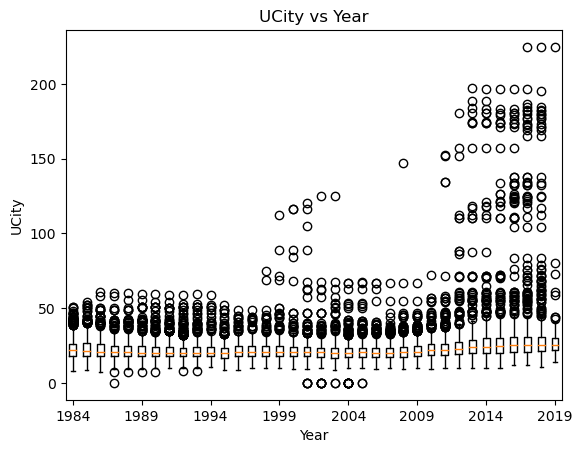

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a variable called 'data_dump'
# and the columns representing UCity and year are named 'UCity' and 'Year' respectively

# Group the data by year and accumulate the UCity values for each year
grouped_data = data_dump.groupby('year')['UCity'].apply(list)
# grouped_data = grouped_data.tail(10)

# Create a list of UCity values for each year
UCity_values = list(grouped_data.values)

# Create the box-and-whisker plot
plt.boxplot(UCity_values)
plt.xlabel('Year')
plt.ylabel('UCity')
plt.title('UCity vs Year')

years = grouped_data.index
x_ticks = range(1, len(years) + 1)
plt.xticks(x_ticks[::5], years[::5])
plt.show()


After 2010, we can see that the increase in outliners are significant, that means during this time the many manufacturers have improved alot in providing good mileage in their vehicles

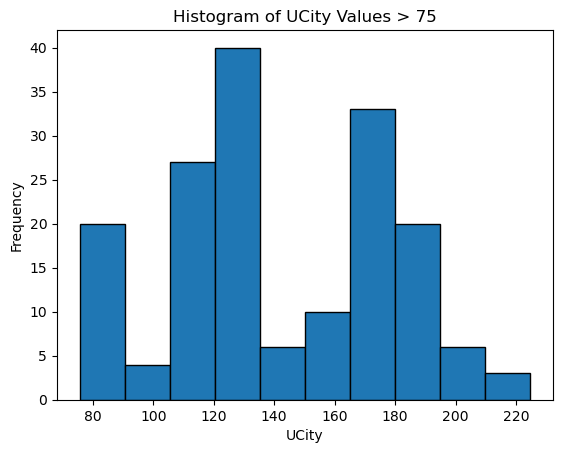

In [7]:

# Filter the data for UCity values greater than 75
filtered_data_UCity75 = data_dump[data_dump['UCity'] > 75]

# Create the histogram
plt.hist(filtered_data_UCity75['UCity'], edgecolor='black')

plt.xlabel('UCity')
plt.ylabel('Frequency')
plt.title('Histogram of UCity Values > 75')

plt.show()


In [8]:
count = (data_dump['UCity'] > 75).sum()
print(f"Total number of vehicles having UCity > 75: {count}")

Total number of vehicles having UCity > 75: 169


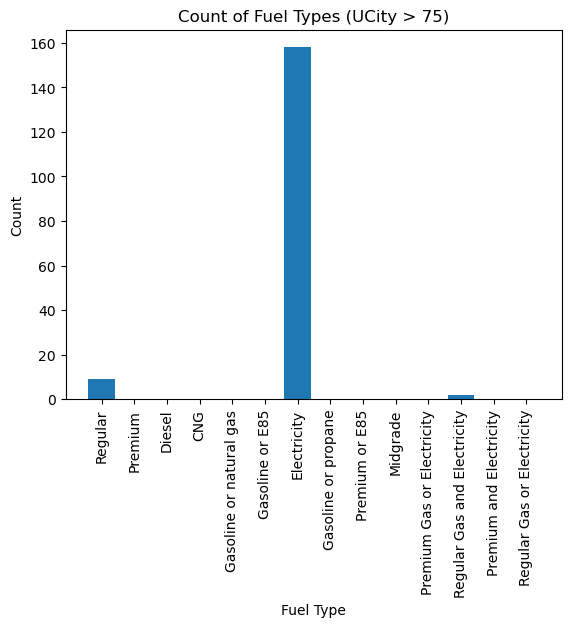

In [9]:
# Get the unique fuel types from the entire dataset
all_fuel_types = data_dump['fuelType'].unique()

# Count the occurrences of each fuelType in the filtered data
fueltype_counts = filtered_data_UCity75['fuelType'].value_counts()

# Create the bar plot
plt.bar(all_fuel_types, fueltype_counts.reindex(all_fuel_types, fill_value=0))
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Fuel Types (UCity > 75)')

plt.xticks(rotation=90)
plt.show()


In [10]:
# Filter the data for UCity values equal to 0
zero_ucity_vehicles = data_dump[data_dump['UCity'] == 0]

# Display the filtered dataset
count = len(zero_ucity_vehicles)
print(f"Count of vehicles having zero UCity value = {count}")

Count of vehicles having zero UCity value = 25


# Moving next to the independent variables and their influence on changing fuel economy over the period of time
# 1st Variable : 'cylinders' 

In [11]:

#Becase Cylinders is a Numeric variable
Cylinders_data = pd.Series(data_dump['cylinders'])
print(Cylinders_data.describe())

count    39910.000000
mean         5.721949
std          1.754891
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64


In [12]:
#As the range is very small, also the rows can be distinctly defined
unique_cylinders = Cylinders_data.unique()
print(unique_cylinders)

[ 4. 12.  8.  6.  5. 10.  2.  3. nan 16.]


In [13]:
#We have found few values with NA and the count is very small in comparision to total values 
nan_values_count = data_dump['cylinders'].isna().sum()
print(f"Count of vehicles with NA-Not Available values in Cylinders: {nan_values_count}")

Count of vehicles with NA-Not Available values in Cylinders: 171


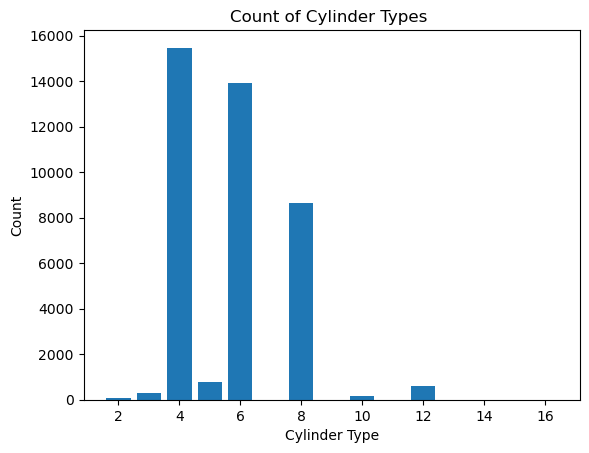

In [14]:
# Get the unique cylinder types from the entire dataset
unique_cylinders = data_dump['cylinders'].unique()

# Count the occurrences of each fuelType in the filtered data
cylinderstype_counts = data_dump['cylinders'].value_counts()

# Create the bar plot
plt.bar(unique_cylinders, cylinderstype_counts.reindex(unique_cylinders, fill_value=0))
plt.xlabel('Cylinder Type')
plt.ylabel('Count')
plt.title('Count of Cylinder Types ')

plt.show()


[4. 8. 6.]
              UCity  cylinders
UCity      1.000000  -0.690308
cylinders -0.690308   1.000000


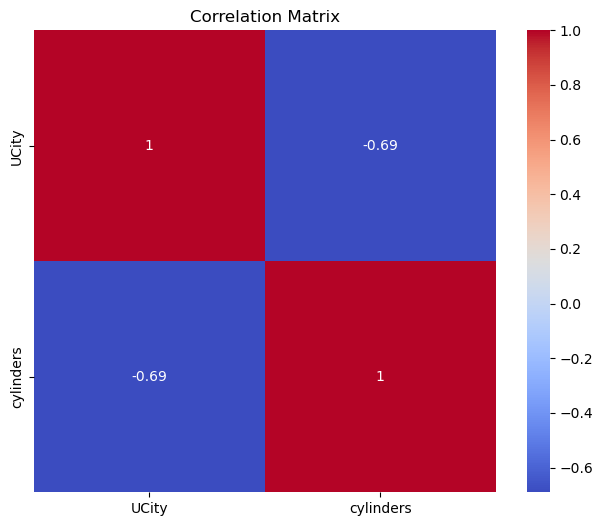

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Lets try to capture correlation between UCity and cylinders taking major cylinders categories in comparision
Cylinder_data = data_dump[data_dump['cylinders'].isin([4, 6, 8])]

# Print the unique cylinder values
unique_cyl = Cylinder_data['cylinders'].unique()
print(unique_cyl)

# Calculate the correlation matrix
correlation_matrix = Cylinder_data[['UCity', 'cylinders']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Vehicle with 4.0 cylinders


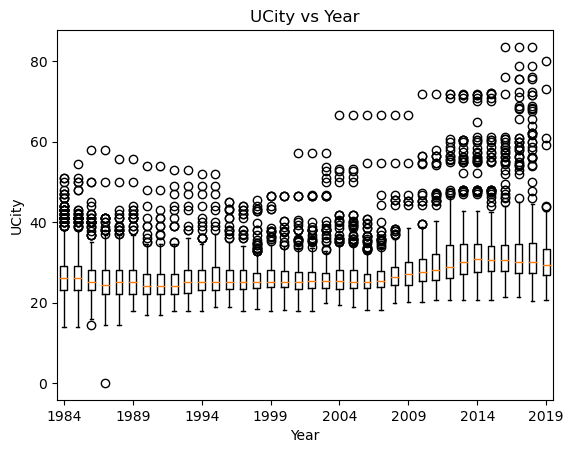




Vehicle with 6.0 cylinders


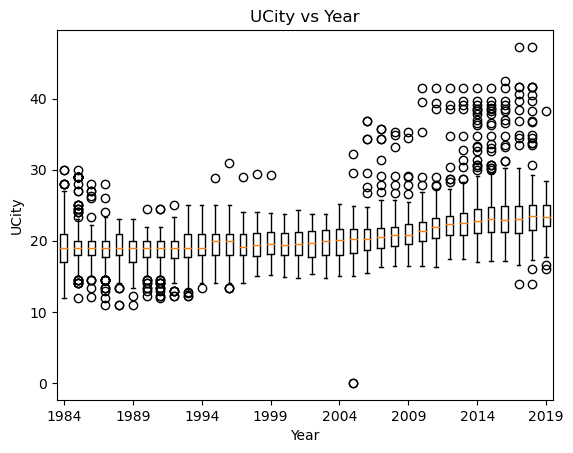




Vehicle with 8.0 cylinders


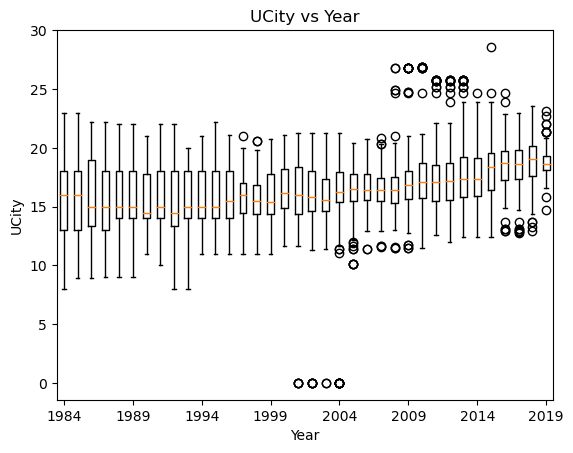

In [16]:
#We can see that the 4,6,8 Cylinder type vehicles have a good negative correlation with UCity. Let's dive deep in the comparing the same



def getCylindersVsUCity():
    unique_cylinders = Cylinder_data['cylinders'].unique()
    unique_cylinders.sort()
    for i in unique_cylinders:
        print(f"Vehicle with {i} cylinders")
        filtered_cylin_data = Cylinder_data[Cylinder_data['cylinders']==i]
        grouped_data = filtered_cylin_data.groupby('year')['UCity'].apply(list)
        # Create a list of UCity values for each year
        UCity_values = list(grouped_data.values)
        #Create the box-and-whisker plot
        plt.boxplot(UCity_values)
        plt.xlabel('Year')
        plt.ylabel('UCity')
        plt.title('UCity vs Year')

        # Set x-axis tick labels as the years
        years = grouped_data.index
        x_ticks = range(1, len(years) + 1)
        plt.xticks(x_ticks[::5], years[::5])
        plt.show()
        print("\n\n")

getCylindersVsUCity()


It's clear that vehicles with 4,6,8 Cylinder Types are doing very well on UCity(MPG). 
In recent year. Also, the 4 and 6 Cylinder vehicles have significantly showed good UCity, 
When comparing the number of outliers
    

# 2nd Variable : 'fuelType' 

In [17]:

#Because fuelType is a Categorical variable
FuelType_data = pd.Series(data_dump['fuelType'])
fuelTypes = data_dump['fuelType'].unique()
print(f"We have {np.count_nonzero(fuelTypes)} Fuel Types: ")
print(fuelTypes)

We have 14 Fuel Types: 
['Regular' 'Premium' 'Diesel' 'CNG' 'Gasoline or natural gas'
 'Gasoline or E85' 'Electricity' 'Gasoline or propane' 'Premium or E85'
 'Midgrade' 'Premium Gas or Electricity' 'Regular Gas and Electricity'
 'Premium and Electricity' 'Regular Gas or Electricity']


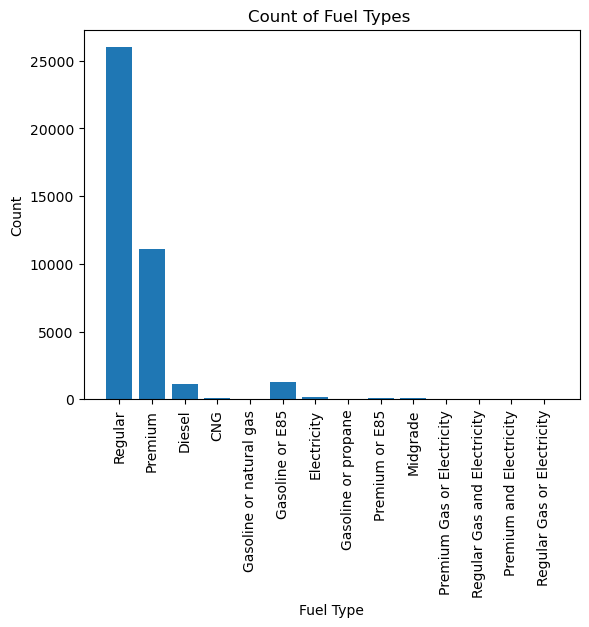

In [18]:
# Get the unique cylinder types from the entire dataset
all_fuel_types = data_dump['fuelType'].unique()

# Count the occurrences of each fuelType in the filtered data
fuelTypeStats = data_dump['fuelType'].value_counts()

# Create the bar plot
plt.bar(all_fuel_types, fuelTypeStats.reindex(all_fuel_types, fill_value=0))
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Fuel Types ')

plt.xticks(rotation=90)
plt.show()


Majority of our data is consisting of Regular or premium fuelType. Let's try to see the stats for the fuel type over years.

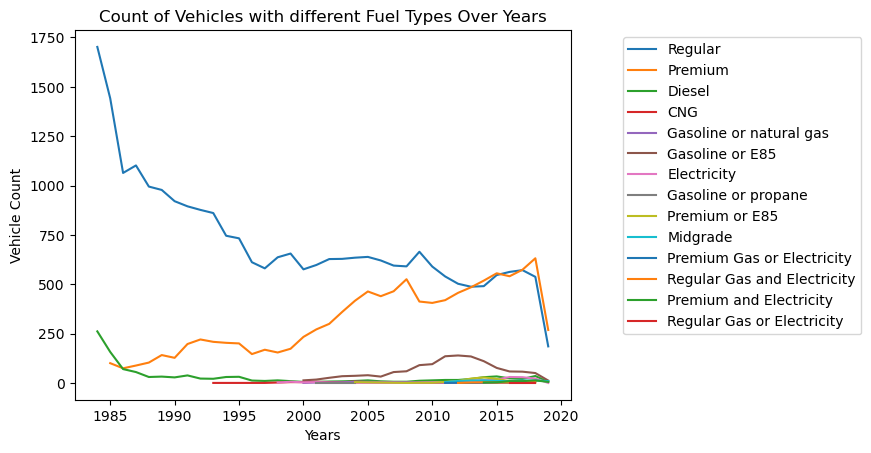

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def getFuelTypeDetails(data):
    fueldataset = data 

    for i in all_fuel_types:

        # Filter dataset for fuel type 'Diesel'
        fuel_type_data = fueldataset[fueldataset['fuelType'] == i]

        # Calculate count of vehicles for each year
        vehicle_count = fuel_type_data.groupby('year').size()

        # Extract the years and vehicle counts
        years = vehicle_count.index
        counts = vehicle_count.values

        # Create the line chart
        plt.plot(years, counts, label=i)

    # Customize the chart
    plt.title('Count of Vehicles with different Fuel Types Over Years')
    plt.xlabel('Years')
    plt.ylabel('Vehicle Count')
    # Adjust the legend position manually
    plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

    # Display the chart
    plt.show()
    
getFuelTypeDetails(data_dump)


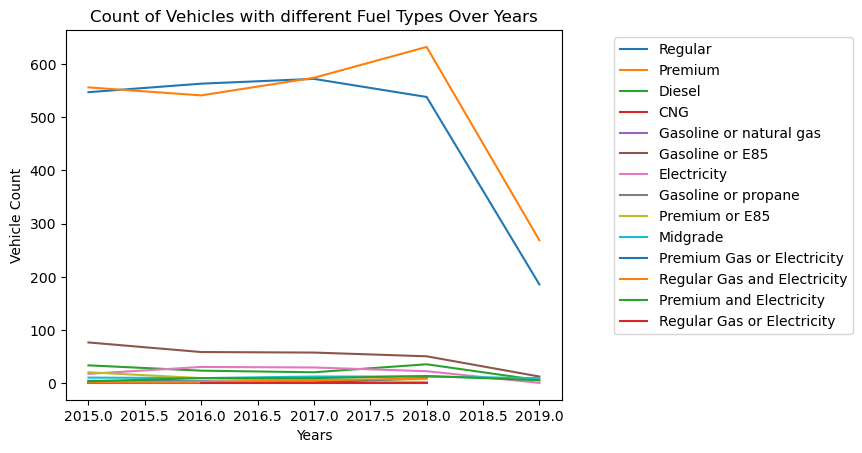

In [20]:
#Clearly from the data we can see that the fuelType Regular and Premium shows a drastic decrease
#Lets try to figure out the same for last 5 years.

Data_5_years = data_dump[data_dump['year'] >= 2015]

getFuelTypeDetails(Data_5_years)

Lets try to fetch some relationship between UCity and fuelType

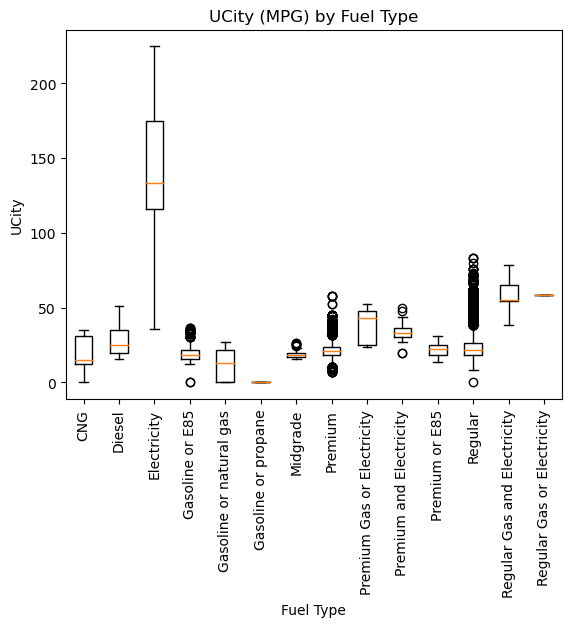

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Group the UCity values by fuelType
grouped_data = data_dump.groupby('fuelType')['UCity']

# Create a list of UCity values for each fuel type
fuel_type_data = [grouped_data.get_group(fuel_type) for fuel_type in grouped_data.groups]

# Create the box plot
plt.boxplot(fuel_type_data, labels=grouped_data.groups)

# Customize the plot
plt.title('UCity (MPG) by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('UCity')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


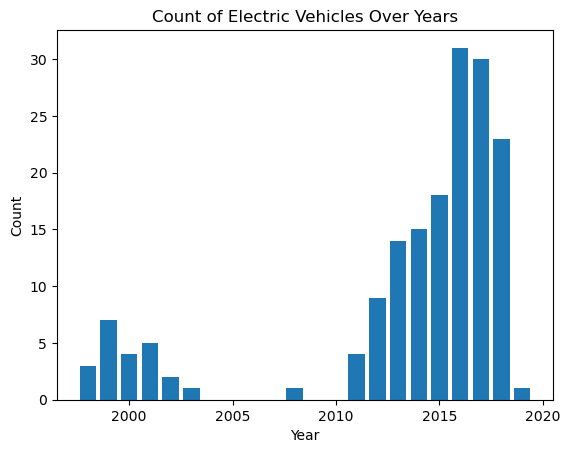

In [22]:
#Clearly from the above boxplot we can see that vehicles having fuelType = 'Electricity' have the highest UCity compared to rest of the  FuelTypes
#Lets see the increase in electric vehicles over years

electric_vehicles = data_dump[data_dump['fuelType'] == 'Electricity']

# Calculate count of electric vehicles for each year
vehicle_count = electric_vehicles['year'].value_counts().sort_index()
# Create the bar plot
plt.bar(vehicle_count.index, vehicle_count.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Electric Vehicles Over Years')

# Display the plot
plt.show()

Although the count electric vehicles is very less but it seems to be increasing with years

# 3rd Variable = 'displ'

In [23]:
print("Stats for displ variable:")
print(data_dump['displ'].describe())
print(f"NA Count for displ variable: {data_dump['displ'].isnull().sum()}")


Stats for displ variable:
count    39912.000000
mean         3.301581
std          1.359536
min          0.000000
25%          2.200000
50%          3.000000
75%          4.300000
max          8.400000
Name: displ, dtype: float64
NA Count for displ variable: 169


          UCity     displ
UCity  1.000000 -0.713249
displ -0.713249  1.000000


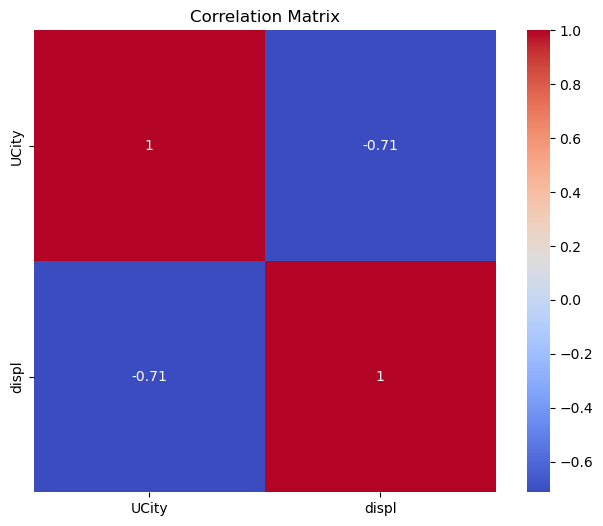

In [24]:
#Because the NA count for "displ" variable is very less we can work on this
#displ – Engine displacement - the size of an engine in liters

#Lets try to capture correlation between UCity and cylinders taking major cylinders categories in comparision
#removing NA values
displ_data = data_dump.dropna(subset=['displ'])


# Calculate the correlation matrix
correlation_matrix = displ_data[['UCity', 'displ']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

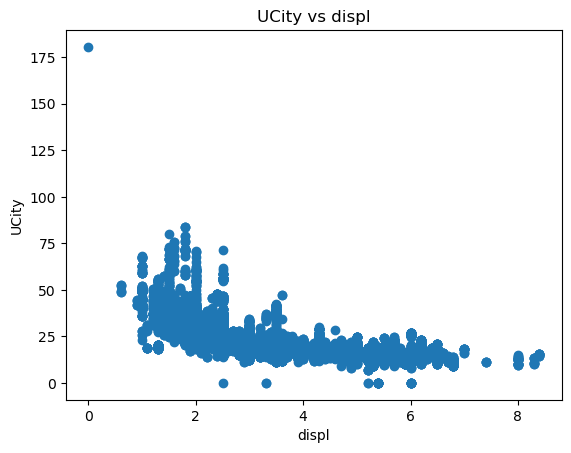

In [25]:
#as the got a good correlation between UCity and displ that is equal to -0.71
#that means the larger the Engine displacement, the less is the UCity i.e. MPG which is obvious

# Create the scatter plot
plt.scatter(displ_data['displ'], displ_data['UCity'])

# Customize the plot
plt.title('UCity vs displ')
plt.xlabel('displ')
plt.ylabel('UCity')

# Display the plot
plt.show()

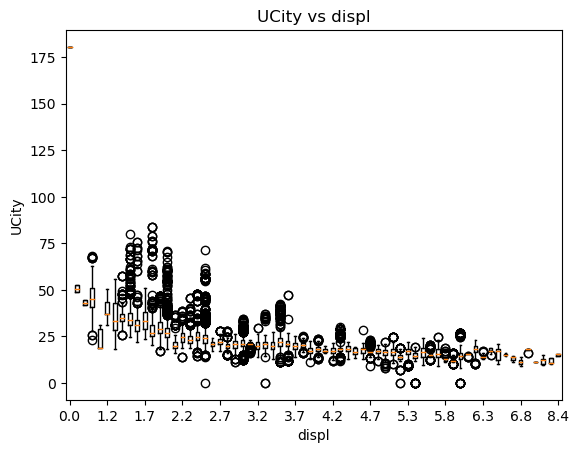

In [26]:
#This is clear that the larger is the engine capacity(displ), the less is the UCity value. 

import matplotlib.pyplot as plt

# Group the data by 'displ' and get the corresponding 'UCity' values
grouped_data = displ_data.groupby('displ')['UCity'].apply(list)

# Create the box plot
plt.boxplot(grouped_data)

plt.title('UCity vs displ')
plt.xlabel('displ')
plt.ylabel('UCity')

# Set the x-axis tick labels
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index)
disp = grouped_data.index
x_ticks = range(1, len(disp) + 1)
plt.xticks(x_ticks[::5], disp[::5])

# Display the plot
plt.show()


This tells that displ significantly impact the UCity with correlation of negative 0.71

# 4th variable "VClass"


In [27]:
#VClass tells about the vehicle class and has dType = Object, that means it's categorical variable
class_freq = data_dump['VClass'].value_counts()
print(class_freq)

Compact Cars                          5751
Subcompact Cars                       5036
Midsize Cars                          4697
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2090
Large Cars                            2072
Two Seaters                           2025
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1579
Special Purpose Vehicles              1455
Minicompact Cars                      1367
Standard Pickup Trucks 2WD            1221
Vans                                  1141
Standard Pickup Trucks 4WD            1044
Small Sport Utility Vehicle 4WD        734
Midsize-Large Station Wagons           656
Special Purpose Vehicle 2WD            643
Standard Sport Utility Vehicle 4WD     577
Small Pickup Trucks                    538
Midsize Station Wagons                 536
Small Sport Utility Vehicle 2WD        530
Small Pickup Trucks 2WD                457
Vans, Cargo Type                       438
Minivan - 2

In [28]:
#We have many different classes of Vehicles, lets try to take classes who have frequency > 1000
freq_gt_1000 = class_freq[class_freq > 1000]

Vclass_data = data_dump[data_dump['VClass'].isin(freq_gt_1000.index)]
print(f"Total rows of data we have for VClass :{Vclass_data.shape[0]}")


Total rows of data we have for VClass :33459


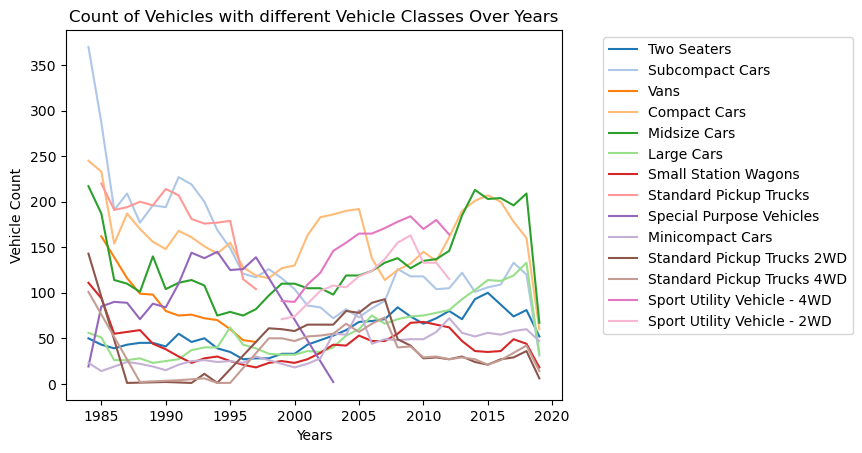

In [29]:
import matplotlib.pyplot as plt

def getVClassDetails(data):
    vClasses = data 
    unique_classes = vClasses['VClass'].unique()

    # Create a color palette for the lines
    colors = plt.cm.tab20(range(len(unique_classes)))

    for i, color in zip(unique_classes, colors):
        # Filter dataset for each vehicle class
        vclass_specific = vClasses[vClasses['VClass'] == i]

        # Calculate count of vehicles for each year
        vehicle_count = vclass_specific.groupby('year').size()

        # Extract the years and vehicle counts
        years = vehicle_count.index
        counts = vehicle_count.values

        # Create the line chart with specified color
        plt.plot(years, counts, label=i, color=color)

    # Customize the chart
    plt.title('Count of Vehicles with different Vehicle Classes Over Years')
    plt.xlabel('Years')
    plt.ylabel('Vehicle Count')

    # Create a custom legend outside the loop
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.6, 1))

    # Display the chart
    plt.show()
    
getVClassDetails(Vclass_data)


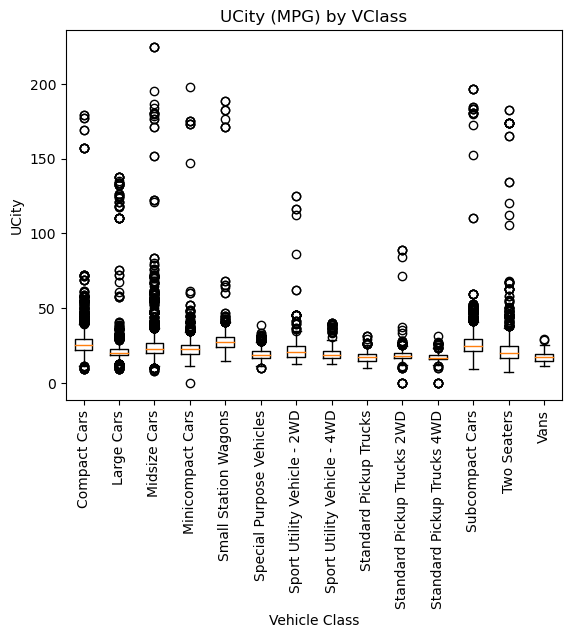

In [30]:
#Let's try to find some relation of VClasses with UCity 

unique_classes = Vclass_data['VClass'].unique()

# Group the UCity values by VClass
grouped_data = Vclass_data.groupby('VClass')['UCity']

# Create a list of UCity values for each vehicle class having freq > 1000
vclass_data = [grouped_data.get_group(unique_classes) for unique_classes in grouped_data.groups]

# Create the box plot
plt.boxplot(vclass_data, labels=grouped_data.groups)

# Customize the plot
plt.title('UCity (MPG) by VClass')
plt.xlabel('Vehicle Class')
plt.ylabel('UCity')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [31]:
#This showed us the relationship of various VClasses and UCity where almost every vehicle class have an average around 25-30 MPG.
#Still we have some outliers that have performed exceptionally well crossing over 100 UCity in some classes:
Above_100_UCity_data =  data_dump[data_dump['UCity'] > 100]
UniqueClasses_100 = Above_100_UCity_data['VClass'].unique()
print(f"Vehicle classes that have showed UCity Value above 100 are : \n\n {UniqueClasses_100}")


Vehicle classes that have showed UCity Value above 100 are : 

 ['Midsize Station Wagons' 'Sport Utility Vehicle - 2WD' 'Two Seaters'
 'Minicompact Cars' 'Midsize Cars' 'Subcompact Cars' 'Compact Cars'
 'Large Cars' 'Small Station Wagons' 'Small Sport Utility Vehicle 2WD'
 'Standard Sport Utility Vehicle 4WD']


We can conclude using this data that majorly Small size and Mid size car have shown UCity value > 100

#  5th variable 'trany'

In [32]:
#dtype ='object', it's a categorical variable
print("Type of transmission and it's count in the data dump :")
trans_data = data_dump
trans_unique = trans_data['trany'].unique()
print(trans_data['trany'].value_counts())

Type of transmission and it's count in the data dump :
Automatic 4-spd                     11045
Manual 5-spd                         8351
Automatic 3-spd                      3151
Automatic (S6)                       2984
Manual 6-spd                         2671
Automatic 5-spd                      2198
Automatic 6-spd                      1579
Manual 4-spd                         1483
Automatic (S8)                       1421
Automatic (S5)                        830
Automatic (variable gear ratios)      766
Automatic 7-spd                       708
Automatic (AM-S7)                     374
Automatic 8-spd                       347
Automatic (S7)                        307
Automatic (S4)                        233
Automatic (AM7)                       216
Automatic 9-spd                       208
Automatic (AV-S6)                     189
Automatic (A1)                        163
Automatic (AM6)                       136
Automatic (AV-S7)                     126
Manual 7-spd         

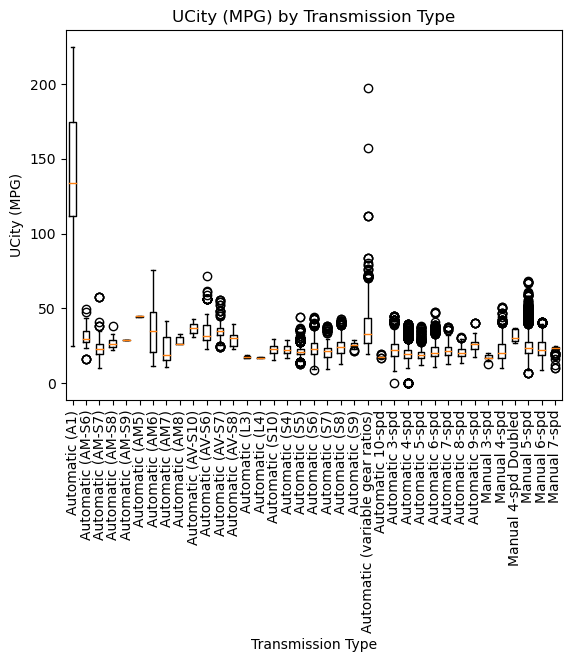

In [33]:
# so we have many transmission types that we can explore lets try to analyse the transmission type that have frequency > 500

trans_freq = trans_data['trany'].value_counts()
trans_data = trans_data[trans_data['trany'].isin(trans_freq[trans_freq > 500].index)]
unique_trany = trans_data['trany'].unique()

grouped_data = data_dump.groupby('trany')['UCity']

# Create a list of UCity values for each trany type
trany_type_data = [grouped_data.get_group(unique_trany) for unique_trany in grouped_data.groups]

# Create the box plot
plt.boxplot(trany_type_data, labels=grouped_data.groups)

# Customize the plot
plt.title('UCity (MPG) by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('UCity (MPG)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


Here are few transmissions that are providing MPG > 50 :
['Manual 5-spd' 'Manual 4-spd' nan 'Automatic (variable gear ratios)'
 'Automatic (AV-S7)' 'Automatic (A1)' 'Automatic (AV-S6)'
 'Automatic (AM-S7)' 'Automatic (AM6)']


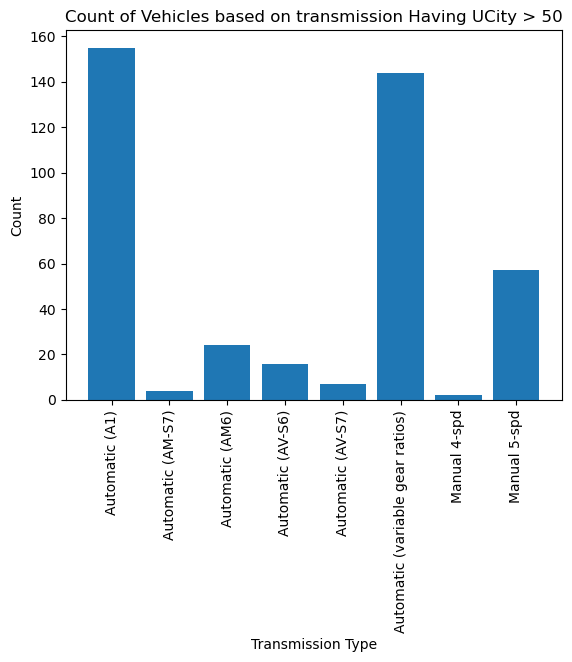

In [34]:
#It's clear from that above relation between that we have Automatic(A1) trany category that is giving MPG or UCity value above 100. 
#Lets explore the transmission that provides UCity above 50


trans_data = data_dump
trans_data = trans_data[trans_data['UCity']>50]
unique_trany = trans_data['trany'].unique()
print("Here are few transmissions that are providing MPG > 50 :")
print(unique_trany)

vehicle_count = trans_data['trany'].value_counts().sort_index()
# Create the bar plot
plt.bar(vehicle_count.index, vehicle_count.values)
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Count of Vehicles based on transmission Having UCity > 50')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
# Display the plot
plt.show()


Conclusion can be made that Automatic(A1) and Automatic (variable gear ratios) transmission categories in 'trany' are major transmissions giving UCity above 50.

# 6th variable= 'atvType'

In [35]:
print(data_dump['atvType'].describe())

count     3374
unique       8
top        FFV
freq      1412
Name: atvType, dtype: object


In [36]:
#We have 8 types of atvTypes that are given in the csv and it's a categorical variable
atv_data = data_dump
unique_atvType = atv_data['atvType'].unique()
print(atv_data['atvType'].value_counts())


FFV               1412
Diesel            1070
Hybrid             539
EV                 168
Plug-in Hybrid     107
CNG                 50
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: atvType, dtype: int64


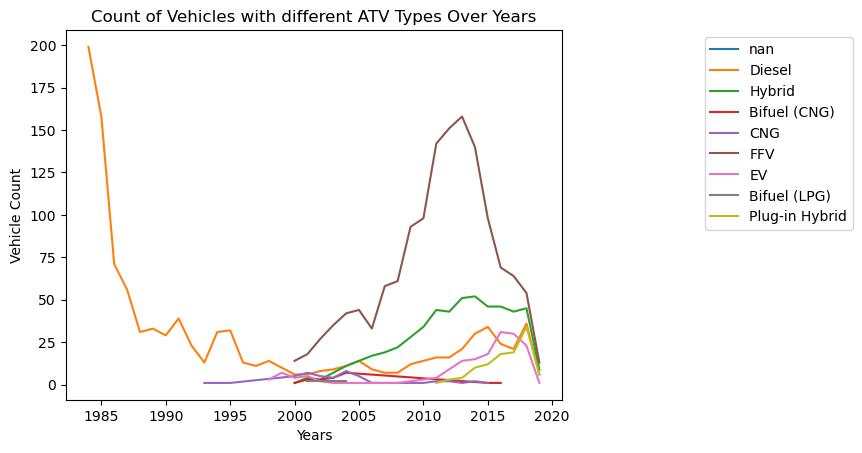

In [37]:

def getatvTypeDetails(data):
    atvdataset = data 

    for i in unique_atvType:

        # Filter dataset for fuel type 'Diesel'
        atv_type_data = atvdataset[atvdataset['atvType'] == i]

        # Calculate count of vehicles for each year
        vehicle_count = atv_type_data.groupby('year').size()

        # Extract the years and vehicle counts
        years = vehicle_count.index
        counts = vehicle_count.values

        # Create the line chart
        plt.plot(years, counts, label=i)

    # Customize the chart
    plt.title('Count of Vehicles with different ATV Types Over Years')
    plt.xlabel('Years')
    plt.ylabel('Vehicle Count')
    # Adjust the legend position manually
    plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

    # Display the chart
    plt.show()
    
getatvTypeDetails(atv_data)


This clearly tells us about the significant fall in vehicles with avtType Diesel from 1985 to 2019.
Also the FFV vehicles increased from 2000 to 2014 and then decrease with the same pace reaching 2019.
Major increase in trend from year 2005 onwards can be seen in Hybrid, EV and Plug-in Hybrid. 


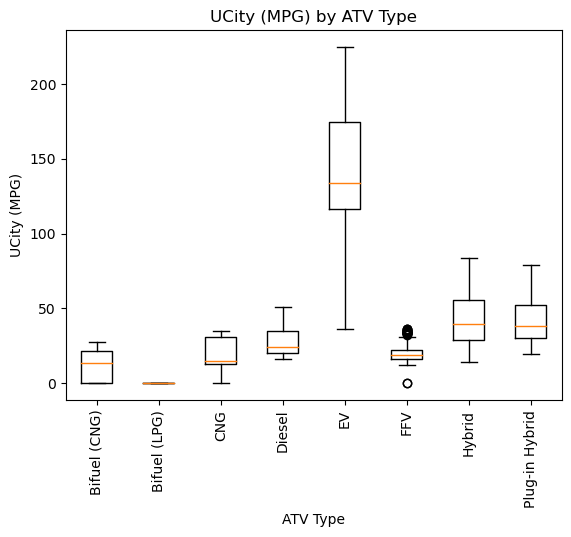

In [38]:
#Let's try to analyse the relation between atvType and UCity
grouped_data = data_dump.groupby('atvType')['UCity']

# Create a list of UCity values for each trany type
trany_type_data = [grouped_data.get_group(unique_atvType) for unique_atvType in grouped_data.groups]

# Create the box plot
plt.boxplot(trany_type_data, labels=grouped_data.groups)

# Customize the plot
plt.title('UCity (MPG) by ATV Type')
plt.xlabel('ATV Type')
plt.ylabel('UCity (MPG)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


The above Box plot tells us that avtType EV have potential to reach UCity value above 100, also Hybrid and Plug-in Hybrids are performing well in UCity. From above two plots we can say that in recent years, we are moving towards producing more vehicles that can provide us good 

# 7th and 8th variables= 'hpv' and 'hlv'

In [39]:
print("Stats for hpv variable:")
print(data_dump['hpv'].describe())
print(f"Zero value Count for hpv variable: {(data_dump['hpv']==0).sum()}\n\n")

print("Stats for hlv variable:")
print(data_dump['hlv'].describe())
print(f"Zero value Count for hlv variable: {(data_dump['hlv']==0).sum()}")

Stats for hpv variable:
count    40081.000000
mean        10.355630
std         28.114545
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        195.000000
Name: hpv, dtype: float64
Zero value Count for hpv variable: 35241


Stats for hlv variable:
count    40081.000000
mean         2.019585
std          5.947612
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         49.000000
Name: hlv, dtype: float64
Zero value Count for hlv variable: 35240


Although we have very less none zero data for 'hpv' and 'hlv' variable, lets try to find correlation of hpv and hlv with UCity 

          UCity       hpv       hlv
UCity  1.000000  0.256158  0.229395
hpv    0.256158  1.000000  0.933173
hlv    0.229395  0.933173  1.000000


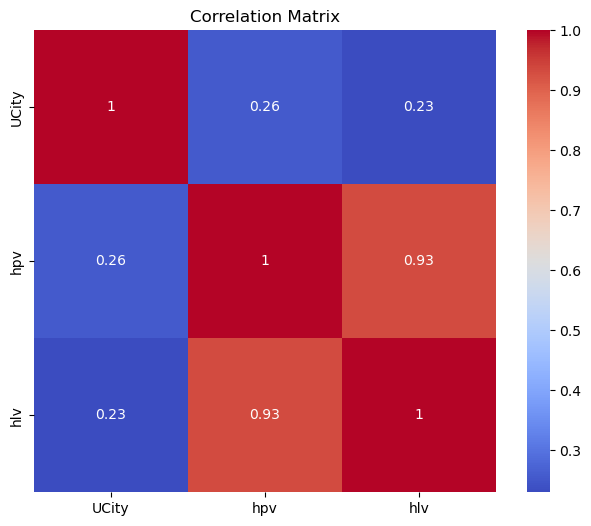

In [40]:
# Calculate the correlation matrix
correlation_matrix = data_dump[['UCity', 'hpv','hlv']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Cleared from above we have very less correlation value of .26 between hpv and UCity.
Cleared from above we have very less correlation value of .23 between hlv and UCity.
Also, hpv and hlv have a correlation value of .93 that means both are highly correlated to each other.

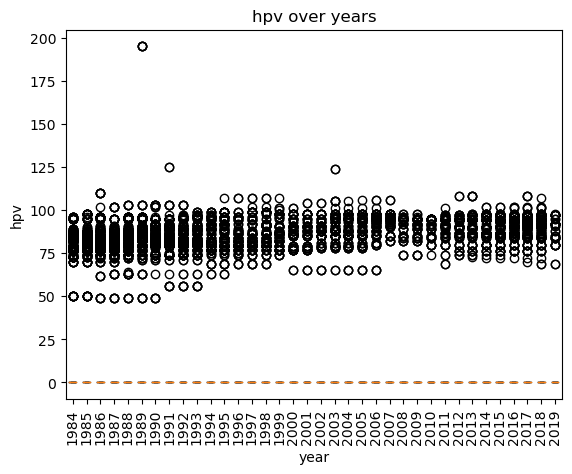

In [41]:
#Let's try to analyse the hpv over years

grouped_data = data_dump.groupby('year')['hpv']

years = data_dump['year'].unique()

# Create a list of hvp values for each year
hpv_data = [grouped_data.get_group(years) for years in grouped_data.groups]

# Create the box plot
plt.boxplot(hpv_data, labels=grouped_data.groups)

# Customize the plot
plt.title('hpv over years')
plt.xlabel('year')
plt.ylabel('hpv')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


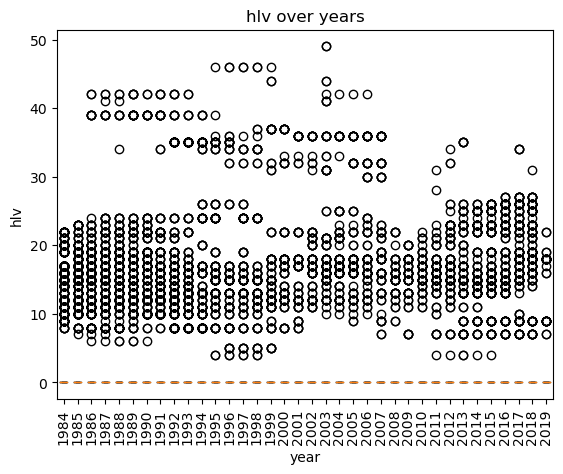

In [42]:
#Let's try to analyse the hlv over years

grouped_data = data_dump.groupby('year')['hlv']

years = data_dump['year'].unique()

# Create a list of hvp values for each year
hlv_data = [grouped_data.get_group(years) for years in grouped_data.groups]

# Create the box plot
plt.boxplot(hlv_data, labels=grouped_data.groups)

# Customize the plot
plt.title('hlv over years')
plt.xlabel('year')
plt.ylabel('hlv')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


The count of hlv and hpv seems to be very similar over the years. Also, the correlation of both the variables with UCity is very weak. But, Correlation between hlv and hpv is .93, that means, if we want to consider the hatchback volume, we can keep anyone from hlv and hpv. No need to keep both in consideration.

# 9th and 10th  variables = 'barrels08'   and 'barrelsA08'

Both the terms tells us about the annual petroleum consumption in barrels for fuelType1 and fuelType2 respectively

In [43]:
print("Stats for hpv variable:")
print(data_dump['barrels08'].describe())
print(f"Zero value Count for barrels08 variable: {(data_dump['barrels08']==0).sum()}\n\n")

print("Stats for barrelsA08 variable:")
print(data_dump['barrelsA08'].describe())
print(f"Zero value Count for barrelsA08 variable: {(data_dump['barrelsA08']==0).sum()}")

Stats for hpv variable:
count    40081.000000
mean        17.363564
std          4.597119
min          0.060000
25%         14.330870
50%         16.480500
75%         19.388824
max         47.087143
Name: barrels08, dtype: float64
Zero value Count for barrels08 variable: 0


Stats for barrelsA08 variable:
count    40081.000000
mean         0.220069
std          1.143270
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.311667
Name: barrelsA08, dtype: float64
Zero value Count for barrelsA08 variable: 38534


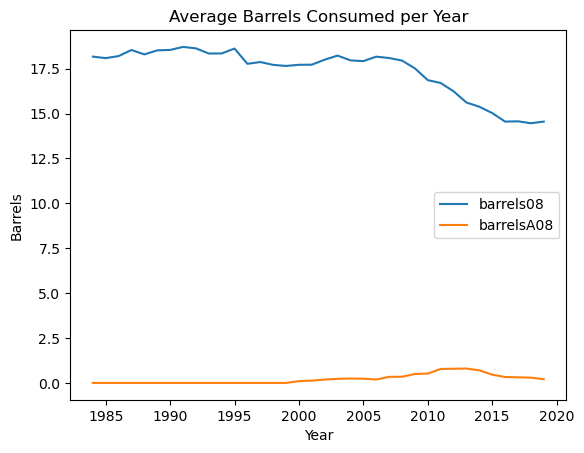

In [44]:
#We have good data for barrels08 when compared with barrelsA08

# Group the data by year and calculate the mean values for barrels08 and barrelsA08
grouped_data = data_dump.groupby('year')[['barrels08', 'barrelsA08']].mean()

# Extract the years and corresponding values for barrels08 and barrelsA08
years = grouped_data.index
barrels08_values = grouped_data['barrels08']
barrelsA08_values = grouped_data['barrelsA08']

# Create the line chart
plt.plot(years, barrels08_values, label='barrels08')
plt.plot(years, barrelsA08_values, label='barrelsA08')


plt.title('Average Barrels Consumed per Year')
plt.xlabel('Year')
plt.ylabel('Barrels')
plt.legend()
plt.show()

From above plot, we can see that the barrels08 (annual petroleum consumption in barrels for fuelType1) has started to decrease after 2007. Also, the barrelsA08 (annual petroleum consumption in barrels for fuelType2) has started to increase after 2007, but still is very less when compared to the barrels08.
Let's try to fetch some correlations with UCity.

               UCity  barrels08  barrelsA08
UCity       1.000000  -0.712469   -0.066128
barrels08  -0.712469   1.000000    0.083513
barrelsA08 -0.066128   0.083513    1.000000


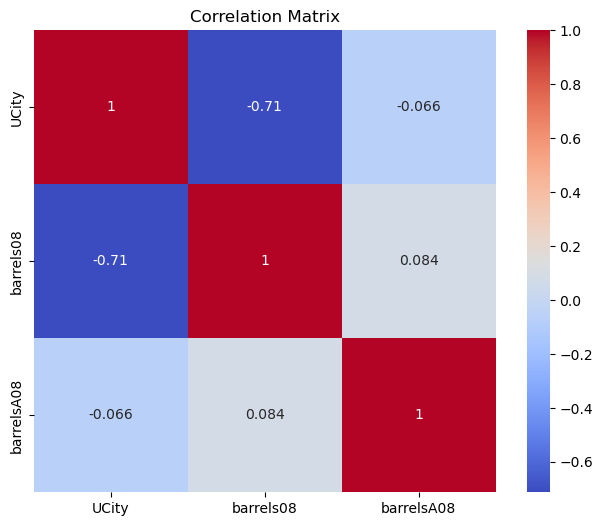

In [45]:
# Calculate the correlation matrix
correlation_matrix = data_dump[['UCity', 'barrels08','barrelsA08']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

From the above correlation matrix we can clearly see that the correlation between barrels08 with UCity is -.71. That signifies that if the barrels08 increases the UCity will decrease. That tell if we increase petroleum consumption for fuelType1, then Over UCity will decrease. Whereas, barrelsA08 with UCity is very less -.066, that means it is not so important variable that can help us get more insights for dependent variable.

Let's try to get some more insight for barrels08 with UCity. 

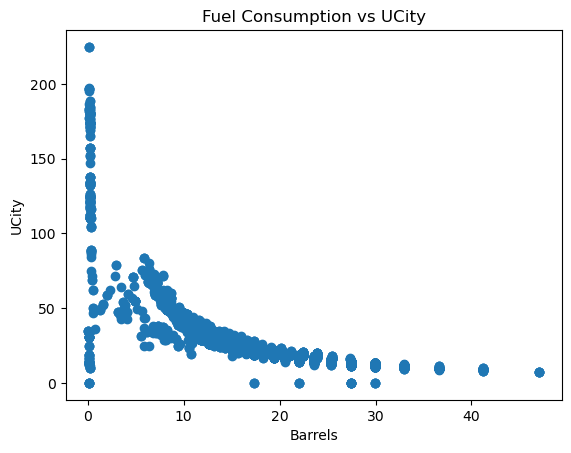

In [46]:
barrel_data = data_dump
# Create the scatter plot for barrels08 and UCity
plt.scatter(barrel_data['barrels08'], barrel_data['UCity'])

# Customize the plot
plt.title('Fuel Consumption vs UCity')
plt.xlabel('Barrels')
plt.ylabel('UCity')

# Display the plot
plt.show()


It's Clear from the scatter plot that, when we increase the Barrels value then the UCity decreases, as realise from the -.71 correlation value.

# 11th  variable = 'make'   

In [47]:
print(data_dump['make'].describe())

count         40081
unique          135
top       Chevrolet
freq           3944
Name: make, dtype: object


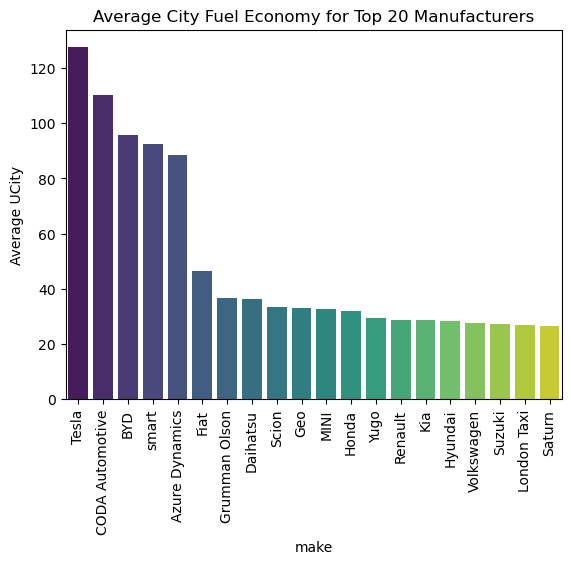

In [48]:
# Calculate the average UCity for each make
avg_ucity_by_make = data_dump.groupby('make')['UCity'].mean().sort_values(ascending=False)

# Take only the top 20 makes
top_20_make = avg_ucity_by_make[:20]

# Create a bar plot
# plt.figure(figsize=(12, 8))
sns.barplot(y= top_20_make.values, x=top_20_make.index, palette='viridis')

# Customize the plot
plt.title('Average City Fuel Economy for Top 20 Manufacturers')
plt.xlabel('make')
plt.ylabel('Average UCity')
plt.xticks(rotation=90)

# Display the plot
plt.show()


The above plot tells us that we have many manufacturers that are making vehicles that provides average UCity > 50

In [49]:
# Remove NaN values from the 'UCity' column
data_without_nan = data_dump.dropna(subset=['UCity'])

# Calculate the average UCity for each make and year
avg_ucity_by_make = data_without_nan.groupby('make')['UCity'].mean()

# Filter the data for makes with an average UCity > 50
filtered_ucity_make_data = avg_ucity_by_make[avg_ucity_by_make > 50]

print(filtered_ucity_make_data)


make
Azure Dynamics      88.400000
BYD                 95.778233
CODA Automotive    110.300000
Tesla              127.505172
smart               92.472678
Name: UCity, dtype: float64


As we have top manufacturers for vehicles that have UCity avg > 50.
Let's, try to find some stats on their vehicles over years.

<Figure size 1200x800 with 0 Axes>

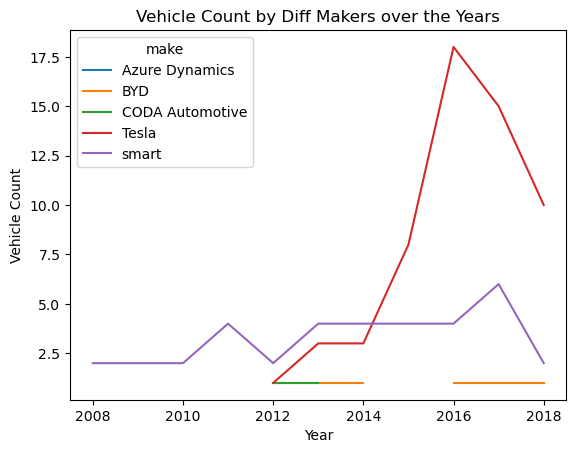

In [50]:
unique_top_makers = filtered_ucity_make_data.index.unique()


filtered_top_manufacturer_data = data_dump[data_dump['make'].isin(unique_top_makers)]

vehicle_count_by_year_make = filtered_top_manufacturer_data.groupby(['year', 'make']).size()


vehicle_count_by_year_make = vehicle_count_by_year_make.reset_index(name='Count')

# Create a pivot table to reshape the data
pivot_table = vehicle_count_by_year_make.pivot(index='year', columns='make', values='Count')

# Plot the pivot table as a line chart
plt.figure(figsize=(12, 8))
pivot_table.plot()

# Customize the plot
plt.title('Vehicle Count by Diff Makers over the Years')
plt.xlabel('Year')
plt.ylabel('Vehicle Count')

# Display the plot
plt.show()



We can see that, the top makers fo vehicles that have average UCity over 50, started to increase after 2008. Most significant maker is Tesla, that showed steep slope from 2012 to 2016, after that has seen significal fall reaching 2018.

# 12th  variable = 'drive'   

In [51]:
print(data_dump['drive'].describe())

count                 38892
unique                    8
top       Front-Wheel Drive
freq                  13939
Name: drive, dtype: object


Here are unique drive types :
['Rear-Wheel Drive' 'Front-Wheel Drive' '4-Wheel or All-Wheel Drive' nan
 '2-Wheel Drive' 'All-Wheel Drive' '4-Wheel Drive'
 'Part-time 4-Wheel Drive' 'Automatic (A1)']


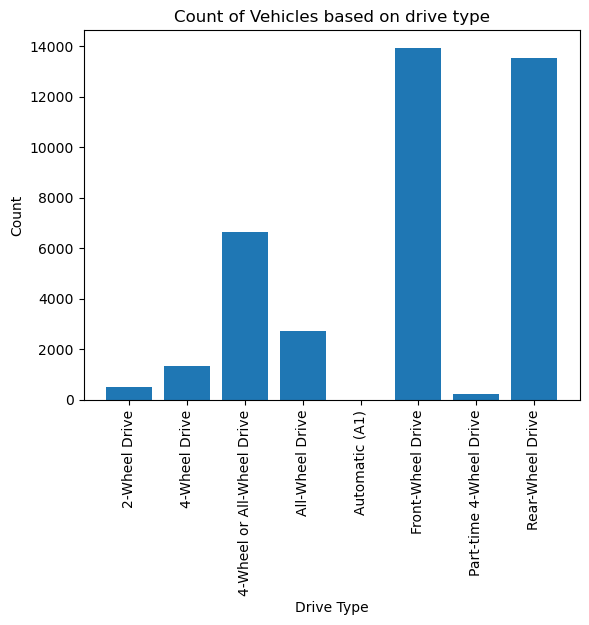

In [52]:
#Drive is also a categorical variable Lets try to get the count of vehicles with respect to drive types
# Calculate the average UCity for each make


drive_data = data_dump
unique_drive = drive_data['drive'].unique()

print("Here are unique drive types :")
print(unique_drive)

vehicle_count = drive_data['drive'].value_counts().sort_index()
# Create the bar plot
plt.bar(vehicle_count.index, vehicle_count.values)
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.title('Count of Vehicles based on drive type')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
# Display the plot
plt.show()

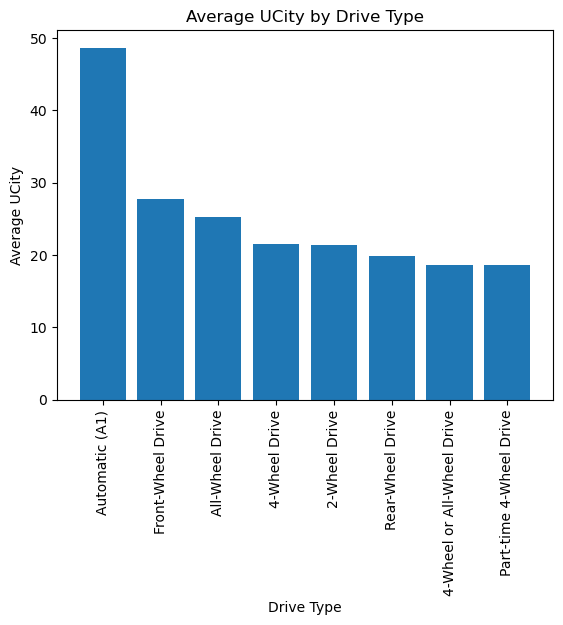

In [53]:
# Group the data by 'drive' and calculate the average UCity
drive_ucity_avg = data_dump.groupby('drive')['UCity'].mean().sort_values(ascending=False)

# Create the bar plot
plt.bar(drive_ucity_avg.index, drive_ucity_avg.values)
plt.xlabel('Drive Type')
plt.ylabel('Average UCity')
plt.title('Average UCity by Drive Type')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


From the above plots, we can see that the Automatic(A1) has an average UCity near to 50. But the count of the Automatic(A1) is insignificant when compared to the other. Hence, we can't conclude much using this variable 'drive'.

# 13th and 14th  variables = 'tCharger'   and 'sCharger'

tCharger stands for Turbo Charged Engine and sCharger stands for Super Charged Engine. Let's fine out the stats for the same.

In [54]:
print("For tCharger we have : \n\n",data_dump['tCharger'].describe())
print("\n Unique Values for tCharger: \n ",data_dump['tCharger'].unique())

For tCharger we have : 

 count     6302
unique       1
top          T
freq      6302
Name: tCharger, dtype: object

 Unique Values for tCharger: 
  [nan 'T']


In [55]:
print("For sCharger we have : \n\n",data_dump['sCharger'].describe())
print("\n Unique Values for sCharger: \n ",data_dump['sCharger'].unique())

For sCharger we have : 

 count     796
unique      1
top         S
freq      796
Name: sCharger, dtype: object

 Unique Values for sCharger: 
  [nan 'S']


We have very few data for variable sCharger and tCharger. We won't be able to do much with these variables in order to get good predictions for UCity.

# 15th and 16th  variables = 'UHighwayA'   and 'UHighway'

UHighway tells us about unadjusted highway MPG for fuelType1 whereas, UHighwayA tells us about unadjusted highway MPG for fuelType2. Let's try to fetch more details about both the variables in our data set.

In [56]:
print("Stats for UHighwayA variable:")
print(data_dump['UHighwayA'].describe())
print(f"Zero value Count for UHighwayA variable: {(data_dump['UHighwayA']==0).sum()}\n\n")

print("Stats for UHighway variable:")
print(data_dump['UHighway'].describe())
print(f"Zero value Count for UHighway variable: {(data_dump['UHighway']==0).sum()}")

Stats for UHighwayA variable:
count    40081.000000
mean         1.076877
std          7.205627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        173.143600
Name: UHighwayA, dtype: float64
Zero value Count for UHighwayA variable: 38580


Stats for UHighway variable:
count    40081.000000
mean        34.105932
std         10.790921
min          0.000000
25%         27.661300
50%         33.024600
75%         38.839200
max        182.700000
Name: UHighway, dtype: float64
Zero value Count for UHighway variable: 25


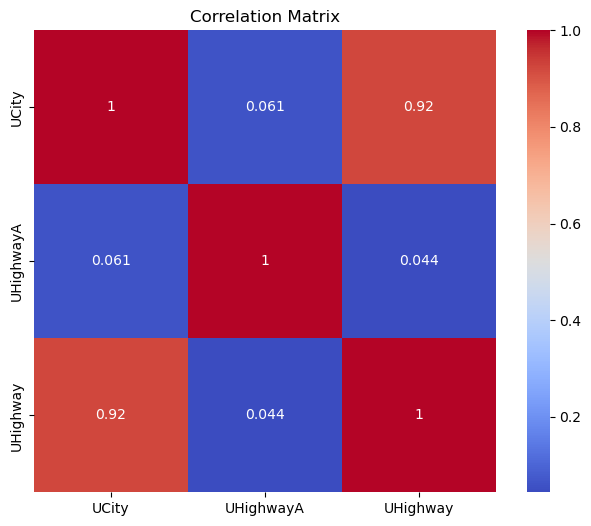

In [57]:
#We have good values for UHighway but for UHighwayA the values are very less.
#Starting with finding Correlations:
# Calculate the correlation matrix
correlation_matrix = data_dump[['UCity', 'UHighwayA','UHighway']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

We can see from the above data that the UHighway has a very high positive correlation of .92 with the UCity. On the other hand because of very less data, the correlation came to be very less between UHighwayA and UCity. 
It's important to note that correlation values can be influenced by the amount and quality of data available. In this case, the limited data for 'UHighwayA' might have resulted in a low correlation.
We can say by seeing the +0.92 correlation value between UHighway and UCity, that both are very much similar in data and can be used in alternate to each other.

# 17th  variable = 'evMotor'   


In [58]:
print(data_dump['evMotor'].describe())

count            736
unique           140
top       288V Ni-MH
freq             122
Name: evMotor, dtype: object


In [59]:
print("Unique Values in evMotor: ", data_dump['evMotor'].nunique())
na_count = data_dump['evMotor'].isna().sum()
print("NA count for evMotor: ", na_count)
print("Available count for evMotor: ", data_dump['evMotor'].count())


Unique Values in evMotor:  140
NA count for evMotor:  39345
Available count for evMotor:  736


It's pretty much clear that the values available for evMotor is extremely less as compare to NA values. 
But from the above plots and analysis, we know the ev sector has shown good value for UCity.
Let's try to analyse the same here.

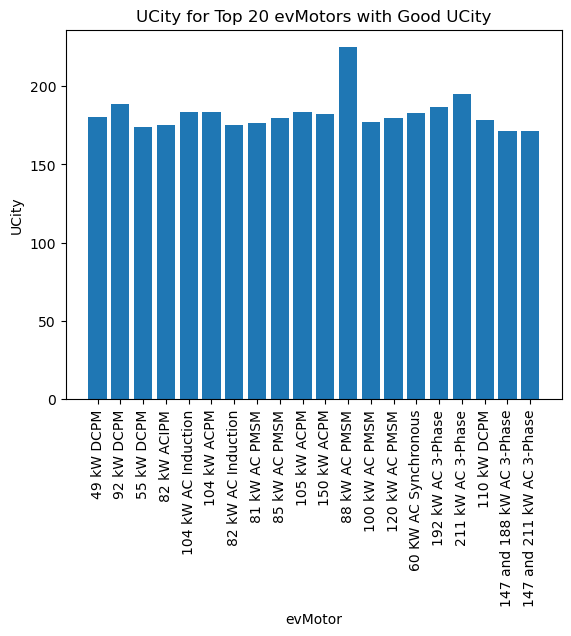

In [60]:
ev_motor_data  = data_dump.dropna(subset=['evMotor'])

#taking mean of UCity based on evMotor type
avg_ucity_by_evMotor = ev_motor_data.groupby('evMotor')['UCity'].mean().sort_values(ascending=False)

#for sake of visualization taking top 20 evMotor Types 
top_20_evMotors = avg_ucity_by_evMotor.head(20)


ev_motor_data = ev_motor_data[ev_motor_data['evMotor'].isin(top_20_evMotors.index)]

# Filter the data for the top 20 evMotors
top_20_evMotors = avg_ucity_by_evMotor.head(20)
filtered_data = ev_motor_data[ev_motor_data['evMotor'].isin(top_20_evMotors.index)]

# Create the bar chart
plt.bar(filtered_data['evMotor'], filtered_data['UCity'])

# Customize the chart
plt.title('UCity for Top 20 evMotors with Good UCity')
plt.xlabel('evMotor')
plt.ylabel('UCity')
plt.xticks(rotation=90)

# Display the chart
plt.show()

From the above plots, we can see that ev Motors have potential to provide UCity > 100. The same trend we have seen earlier as well while analysing other variable that EV vehicles are out performing in giving good UCity value.
But, in the overall analysis, we can't conclude that keep evMotor is a good option because very less data is available for evMotor variable.

# 18th  variable = 'engId'   


In [61]:
print(data_dump['engId'].describe())

count    40081.000000
mean      8377.335695
std      17438.287043
min          0.000000
25%          0.000000
50%        186.000000
75%       4301.000000
max      69102.000000
Name: engId, dtype: float64


Main Question is, will this variable have any relation with UCity(dependent variable) ? 
The answer is obiously no. Variables such as 'engID','model','id',etc., doesn't provide any insights for the predictions. Hence, these variables should be ignored and should not be considered as in prediction model. 

# 19th and 20th  variables = 'co2'   and 'co2A'

'co2' also refers to tailpipe CO2 emissions, but specifically for vehicles categorized under 'fuelType1'.
'co2A' also refers to tailpipe CO2 emissions, but specifically for vehicles categorized under 'fuelType2'.

In [62]:
print("Stats for co2 variable:")
print(data_dump['co2'].describe())
print(f"-1 value Count for co2 variable: {(data_dump['co2']==-1).sum()}\n\n")

print("Stats for co2A variable:")
print(data_dump['co2A'].describe())
print(f"-1 value Count for co2A variable: {(data_dump['co2A']==-1).sum()}")

Stats for co2 variable:
count    40081.000000
mean        80.114069
std        169.097121
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        847.000000
Name: co2, dtype: float64
-1 value Count for co2 variable: 31954


Stats for co2A variable:
count    40081.000000
mean         5.713131
std         56.593602
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        713.000000
Name: co2A, dtype: float64
-1 value Count for co2A variable: 39502


All the -1 values means that the data is not available in those cases. The data is very less to make good predictions.But let's see the pattern for CO2 emission with UCity. 

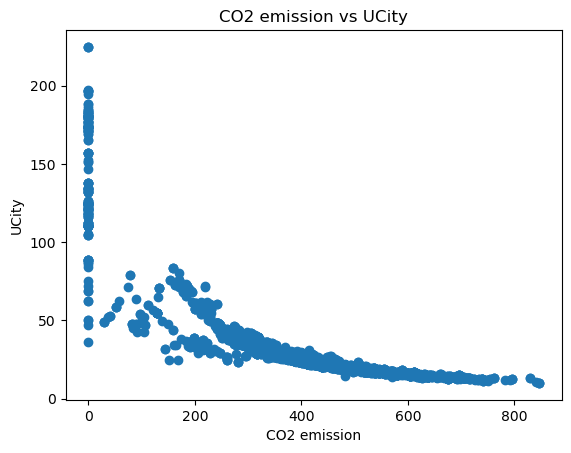

In [63]:
co2_data = data_dump[data_dump['co2'] != -1]

# Create the scatter plot for barrels08 and UCity
plt.scatter(co2_data['co2'], co2_data['UCity'])

# Customize the plot
plt.title('CO2 emission vs UCity')
plt.xlabel('CO2 emission')
plt.ylabel('UCity')

# Display the plot
plt.show()


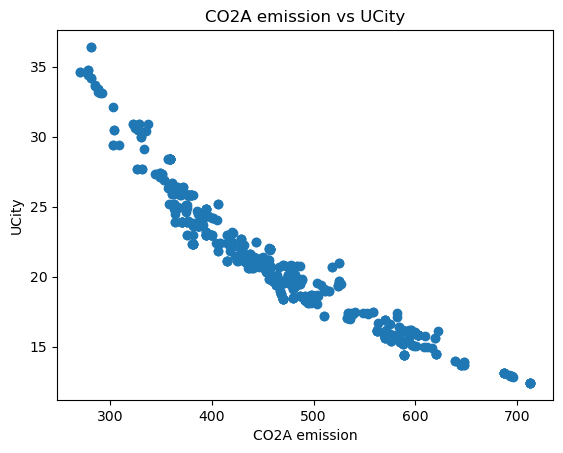

In [64]:
co2A_data = data_dump[data_dump['co2A'] != -1]

# Create the scatter plot for barrels08 and UCity
plt.scatter(co2A_data['co2A'], co2A_data['UCity'])

# Customize the plot
plt.title('CO2A emission vs UCity')
plt.xlabel('CO2A emission')
plt.ylabel('UCity')

# Display the plot
plt.show()


The above two scatter provides us insights that CO2 and CO2A is negatively correlated to UCity. That tells us the more is the CO2 emission the less is the UCity value.

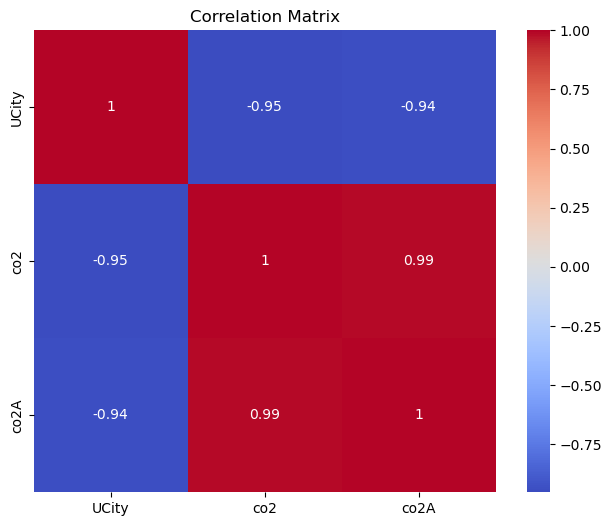

In [65]:
#Starting with finding Correlations:
# Calculate the correlation matrix
filtered_CO2_data = data_dump[(data_dump['co2'] != -1) & (data_dump['co2A'] != -1)]
correlation_matrix = filtered_CO2_data[['UCity', 'co2', 'co2A']].corr()


# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The above plot is very specific to the data where co2A and co2 value is not -1. Hence, we can be very sure that these values in this specific case is highly correlated to each other.
CO2 and CO2A has a + correlation of .99, that shows both are same. As well as the UCity with CO2 is -.94 correlated. Thats is shown by the scatter plots.

# We have covered 20 independent variables so far, Our goal to is predict UCity. 
# Which supervised ML algorithm should we use ?

As it's a supervised learning exercise, we can think of two ways of creating models i.e. Regression and classification  that are used in different scenarios depending on the nature of the problem and the type of data.

What is Regression?
Regression is used when the target variable is continuous or numerical. The goal of regression is to predict a value within a range. Some examples of regression problems include predicting house prices, estimating stock market returns, or forecasting the temperature. In regression, the output is a continuous value, and the algorithm tries to find the relationship between the input variables and the target variable.

What is Classification?
Classification is used when the target variable is categorical or discrete. The goal of classification is to assign a label or category to a given input. For example, classifying emails as spam or not spam, predicting whether a customer will churn or not, or identifying the sentiment of a text (positive, negative, or neutral). In classification, the output is a class label or a probability distribution over classes.

Now the question is what will we choose ?

In the case of a Fuel Economy dataset, the task is predicting a numerical value(UCity), specifically the fuel efficiency of a vehicle. Therefore, regression would be the appropriate approach for this dataset.

Regression models could be trained to predict the continuous target variable, UCity - miles per gallon (MPG), based on various input features like engine displacement, vehicle transmission, vehicle manufacturer, and other relevant factors.

By using regression techniques, we can analyze the relationship between the input variables and the fuel efficiency(UCity) of the vehicles in the dataset. This information can then be used to make predictions for new instances or understand the impact of different features on fuel economy(UCity).

# Which variables should we ignore in prediction model ?

While analysing the dataset, I came accross various variables that has potential to help me make good predictions. But what all variables should I ignore?

a. Irrelevant or redundant variables: 

Variables that have no logical connection to UCity(fuel economy) or that are highly correlated with other included variables may not contribute significantly to the prediction model. It's important to analyze the data and remove such variables to avoid multicollinearity or noise in the model. 
There variables like 'engId','model','id','createdOn'etc. should be avoided because these variable have no logical connection with the 'UCity'.
Similarly, Variables like 'co2' and 'co2A' that shared a perfect positive correlation of .99, we can take any one of these variables instead of keeping both in prediction model as both will show the same curve. And the same reason goes to 'hpv'and 'hlv', we can ignore anyone for our model as they both are highly correlated to each other. 

b. Variables with insufficient data:

If a variable has a significant number of missing values or lacks sufficient variability within the dataset, it may not provide useful information for the prediction model. In such cases, it might be better to exclude these variables.

Such variables that I found in my analysis were, 'co2A' with about 39000 rows missing data, 'evMotor' with 39345 NA rows,'UHighwayA'with 38580 Zero values, 'hpv'and 'hlv' with 32000+ NA values, 'tCharger' and 'sCharger' as well for very insufficient data.

c. Variables that introduce bias: 

Some variables, such as brand or manufacturer, may introduce biases into the model if certain brands or manufacturers are associated with specific fuel efficiency characteristics. In such cases, it might be preferable to exclude these variables to avoid biased predictions. In our case we have a variable 'make' that tells us about the manufacturer of the vehicle, but it's not compulsary that the manufacturer is producing all of it's vehicles with good 'UCity' value. Hence, this type of variables should be carefully analysed. 

# What is overfitting and underfitting? How can we avoid them in our model?

Overfitting: Overfitting occurs when a model learns the training data too well, to the point where it capture noise and random fluctuations in the data rather than capturing the underlying patterns. 
The model performs exceptionally well on the training data but fails to generalize to new data or we can say on test data. Signs of overfitting include excessively low training error but high errors with validation/test data.

Underfitting: Underfitting, on the other hand, occurs when a model is too simple or lacks the capacity to capture the underlying patterns in the training data. 
The model fails to learn the relevant relationships, resulting in poor performance on both the training and new data(Test). Signs of underfitting include high training error and similarly high validation/test error.


# We have many techniques in ML to avoid both the situations:

a. Train/Test Split: 

Split your dataset into two parts: a training set and a test set. Train your model on the training set and evaluate its performance on the test set. This helps you understand how well your model generalizes to unseen data. If the model performs significantly worse on the test set compared to the training set, it may be overfitting.


b. Cross-Validation: 

Instead of a single train/test split, you can use cross-validation, such as k-fold cross-validation. This technique involves dividing your dataset into k subsets (folds), training the model on k-1 folds, and evaluating it on the remaining fold. This process is repeated k times, with each fold serving as the test set once. Cross-validation provides a more robust estimate of model performance and can help detect overfitting.

c. Performance Metrics: 

Choose appropriate performance metrics based on your problem. 
Common metrics for classification tasks include accuracy, precision, recall, F1 score, and area under the ROC curve. 
For regression tasks, metrics like MSE or MAE can be used. By monitoring these metrics during training and evaluation, you can identify signs of overfitting or underfitting.

d. Learning Curves: 

Plot learning curves to visualize the model's performance on both the training and validation sets during training. If the training error is consistently low but the validation error remains high, it indicates overfitting. On the other hand, if both the training and validation errors are high and close together, it suggests underfitting.

e. Regularization Techniques: 

Apply regularization techniques like L1 or L2 regularization to prevent overfitting. These techniques introduce a penalty term to the loss function, encouraging the model to keep the weights small and avoid overly complex representations.

Ridge Regression and Lasso Regression are both regularization techniques commonly used in linear regression models to address the issue of overfitting. Basically, Regularization is a technique that introduces a penalty term to the error function in order to control the complexity of the model and prevent it from fitting the training data too closely.

Ridge Regression, also known as L2 regularization, adds a penalty term to the error function that is proportional to the sum of the squared values of the coefficients, whereas Lasso Regression, on the other hand, uses L1 regularization by adding a penalty term proportional to the sum of the absolute values of the coefficients.
